# Hearts of Iron 4 Dispersed vs Concentrated Industry

Hearts of Iron 4 (henceforth HOI4) is a grand strategy game developed by Paradox Development Studio. In essence, it is a World War 2 simulator where the player manages the country they selected from 1936 to the end of the war (which can last beyond 1945). Among many mechanics in the game, there is one concerning how industry should be built in the country: concentrated or dispersed. This code aims at ascertaining which one brings higher production capacity as it allows for more equipment to be produced for the upcoming war.

The choice is made by researching either of the strategies which takes around 200 days and the choice is, optimally, made early in 1936. The research time is subject to bonuses to research speed which will be ignored for now. An upgrade to the chosen strategy can be researched in the years 1937, 1939, 1941, 1943. That is, every two years after 1937. Researching it earlier will take longer. Some countries can shorten/ignore this penalty however, this applies to both strategies, so we will overlook them. Thus, we will assume that the player takes this choice as a priority and researches it as soon as it is available. That is, 150 days after the 1st of January and every 200 days after that. This is because the player must research Basic Machine Tools to unlock either path.

The research schedule can be summarised with the following table:


### Table 1: Technology Unlocking Schedule

| Date | Technology Unlocked|
| --- | --- |
| 1936-05-30 | Basic Machine Tools |
| 1936-12-16 | Concentrated/Dispersed Industry I |
| 1937-07-20 | Concentrated/Dispersed Industry II |
| 1939-07-20 | Concentrated/Dispersed Industry II |
| 1941-07-20 | Concentrated/Dispersed Industry IV |
| 1943-07-20 | Concentrated/Dispersed Industry V |


To better understand the industry bonuses, we should first know how production (the value that leads to the production of equipment and henceforth P) is calculated. It relies on three factors: the number of factories (F), production efficiency (PE) and a production modifier (PM). Thus, the following formula applies:


$P = F * 4,5 * PE * (1 + PM) $

Having the above formula in mind, we need to consider how the bonuses to technology affect the variables in it. So the bonuses are the following:

### Table 2 Concentrated vs Dispersed Industry

| Strategy | Max Factories in a State | Factory Output | Dockyard Output | Production Efficiency Base | Production Efficiency Retention | Factory Bomb Vulnerability | Conversion Speed Bonus |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Concentrated | <font color='green'>+20%</font> | +15% | <font color='green'>+10%</font> | - | - | - | - |
| Dispersed | <font color='green'>+20%</font> | +10% | <font color='green'>+10%</font> | +5% | +10% | <font color='red'>+20%</font> | <font color='red'>+20%</font> |

Table 2 shows all the bonuses unlocked by either path. Some of which are not relevant for this analysis or are difficult to quantify how they impact P (in <font color="red">red</font>). In <font color='green'>green</font>, you can see the bonuses that are equal for both strategies. As the impact on P from the bonuses in red are difficult to quantify, we will see them as tiebreakers where if the difference between the production from the two strategies is very small, then Dispersed Industry would have the upper hand due to these bonuses. How small? Depends on the player or country's perceived need for factory conversion and bomber defence.

Thus, the differences between the two strategies are the Factory Output and the bonuses to Production Efficiency. To understand what these do, the following paragraphs will explain the variables PM and PE.

## Production Modifier (PM)

The production modifier is the simplest of the two variables in the equation as it affects P directly: 50% PM will increase P by 50%. PM can increase through many ways beyond research, but any increase/decrease would affect both strategies by the same amount. In this analysis we will assume that all these bonuses are not present so that the only thing that affects PM are the bonuses from Therefore, we assume:

## Production Efficiency (PE)

This variable is more complicated as it changes frequently, every day, in fact. The way it works is PE has a given maximum: production efficiency cap (PEC) towards which PE tends. Every day, PE will increase by some amount until it reaches the cap. PEC is increased by technologies which must be included in this analysis. How do we calculate the growth of PE? That is given by the following formula:

$\Delta PE = 0,001 * \frac{PEC^2} {PE}$

For example, if at one day we have infantry equipment being produced with PE at 56.78% and the cap (PEC) is 60%, on the following day PE will be:


$\Delta PE = 0,001 * \frac{0,6^2} {0,5678}$ <br>
$\Delta PE = 0,001 * \frac{0,36} {0,5678}$ <br>
$\Delta PE = 0,001 * 0.6124$ <br>
$\Delta PE = 0,0006 $ <br>

$ PE_{2} = PE_{1} + \Delta PE $ <br>
$ PE_{2} = 0,5678 + 0,0006 $ <br>
$ PE_{2} = 0,5684 $

Thus, in this example, PE on day 2 was 56,84% a 0,06 increase in percent points

To better explain the complexity of PE, we need to go back to how production works. Each equipment type (infantry equipment, towed artillery, tanks, etc) requires factories to be allocated to their production. The number of factories allocated to producing one type of equipment is a production line.

Each factory in the production line has its own PE value. The PE value of the production line is the average of all its factories. When a new factory is allocated, its PE will begin at the Production Efficiency Base (PEB). This value is 10% when the game begins and increases through certain modifiers but especially through the dispersed industry path. 


As such, if a production line with 1 factory is at the PEC (say 50%), and a new factory is added, the production line's PE will decrease to around 30%. Does this mean that increasing the amount of factories comes at a cost of production in the short run? That is, does adding factories to a production line (which decreases the line's PE), negatively affect production or does the extra factory offset this decrease?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

factories = 1
PEs = []
PE = np.average(PEs)
    
PEC = 0.5005
PEB = 0.1001
    
PE1 = [PEB]
PE2 = []
PE3 = []
PE4 = []

for i in range(1, 501):
    
    PE1.append(min(PE1[i-1]+0.001*PEC**2/PE1[i-1], PEC))
    
    if i == 100:
        PE2.append(PEB)
    elif i > 100:
        PE2.append(min(PE2[-1]+0.001*PEC**2/PE2[-1], PEC))
    else:
        PE2.append("Not allocated")
        
    if i == 200:
        PE3.append(PEB)
    elif i > 200:
        PE3.append(min(PE3[-1]+0.001*PEC**2/PE3[-1], PEC)) 
    else:
        PE3.append("Not allocated")
        
    if i == 300:
        PE4.append(PEB)
    elif i > 300:
        PE4.append(min(PE4[-1]+0.001*PEC**2/PE4[-1], PEC))
    else:
        PE4.append("Not allocated")

    if i == 100:
        factories += 1
    if i == 200:
        factories += 1
    if i == 300:
        factories += 1
PE1.pop()
print(PE2[99])

0.1001


C:\Users\claud\anaconda3\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\claud\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [2]:
df = pd.DataFrame()
df1 = pd.DataFrame()

df["PE1"] = PE1
df["PE2"] = PE2
df["PE3"] = PE3
df["PE4"] = PE4

PE = []

for i in range(0, 500):
    if i < 99:
        PE.append(PE1[i])
    if i >= 99 and i <199:
        PE.append((PE1[i] + PE2[i]) / 2)
    if i >= 199 and i <299:
        PE.append((PE1[i] + PE2[i] + PE3[i]) / 3)
    if i >= 299:
        PE.append((PE1[i] + PE2[i] + PE3[i] + PE4[i]) / 4)


df["Avg PE"] = PE
display(df)

,PE1,PE2,PE3,PE4,Avg PE
0,0.100100,Not allocated,Not allocated,Not allocated,0.100100
1,0.102602,Not allocated,Not allocated,Not allocated,0.102602
2,0.105044,Not allocated,Not allocated,Not allocated,0.105044
3,0.107429,Not allocated,Not allocated,Not allocated,0.107429
4,0.109760,Not allocated,Not allocated,Not allocated,0.109760
...,...,...,...,...,...
495,0.500500,0.456944,0.398326,0.329418,0.421297
496,0.500500,0.457492,0.398955,0.330178,0.421781
497,0.500500,0.45804,0.399583,0.330937,0.422265
498,0.500500,0.458587,0.40021,0.331694,0.422748


In [3]:
factories = []

for i in range(1, 501):
    if i < 100:
        factories.append(1)
    elif i >= 100 and i < 200:
        factories.append(2)
    elif i >= 200 and i < 300:
        factories.append(3)
    elif i >= 300:
        factories.append(4)

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

df["Factories"] = factories

df["Production"] = df["Factories"] * 4.5 * df["Avg PE"]
display(df)

,PE1,PE2,PE3,PE4,Avg PE,Factories,Production
0,0.100100,Not allocated,Not allocated,Not allocated,0.100100,1,0.450450
1,0.102602,Not allocated,Not allocated,Not allocated,0.102602,1,0.461711
2,0.105044,Not allocated,Not allocated,Not allocated,0.105044,1,0.472698
3,0.107429,Not allocated,Not allocated,Not allocated,0.107429,1,0.483429
4,0.109760,Not allocated,Not allocated,Not allocated,0.109760,1,0.493922
5,0.112043,Not allocated,Not allocated,Not allocated,0.112043,1,0.504192
6,0.114278,Not allocated,Not allocated,Not allocated,0.114278,1,0.514253
7,0.116470,Not allocated,Not allocated,Not allocated,0.116470,1,0.524117
8,0.118621,Not allocated,Not allocated,Not allocated,0.118621,1,0.533796
9,0.120733,Not allocated,Not allocated,Not allocated,0.120733,1,0.543299


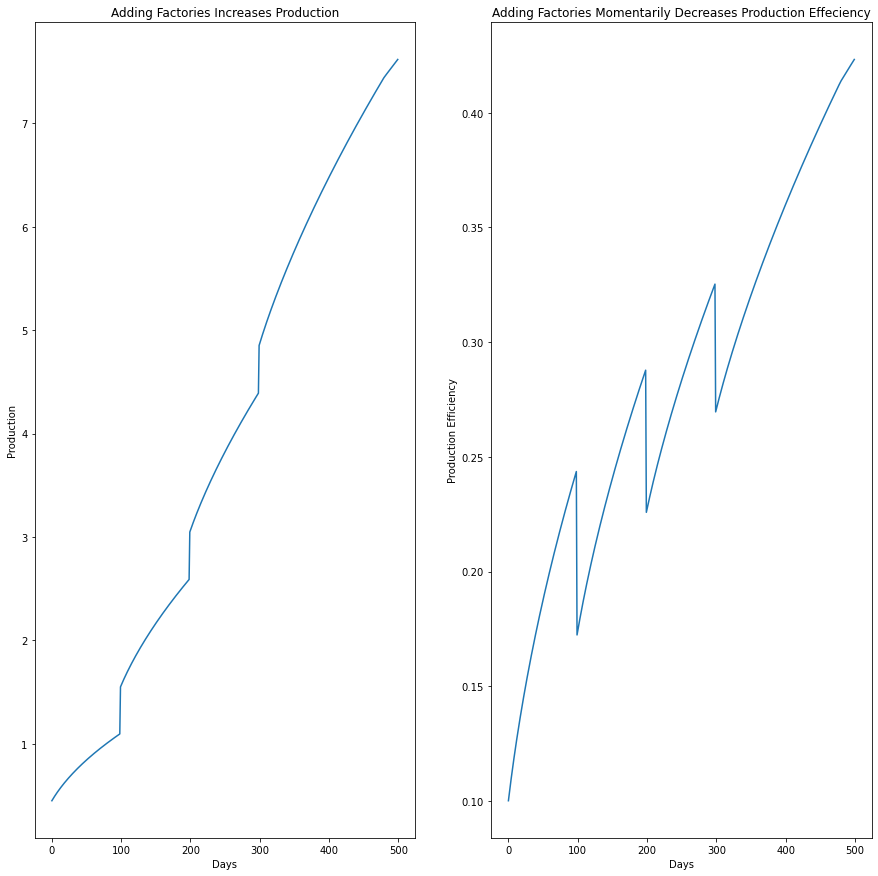

<Figure size 432x288 with 0 Axes>

In [4]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(df["Production"])
ax1.set_xlabel("Days")
ax1.set_ylabel("Production")
ax1.set_title("Adding Factories Increases Production")

ax2.plot(df["Avg PE"])
ax2.set_xlabel("Days")
ax2.set_ylabel("Production Efficiency")
ax2.set_title("Adding Factories Momentarily Decreases Production Effeciency")

plt.show()
plt.clf()

The figure above shows that adding a factory lowers the production efficiency to a point where it takes around 50 days for it to catch up to previous levels. Despite this, total production increases meaning that the added production from the extra factory off-sets the decrease in efficiency.